In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Monty Hall Problem

Problem Description: Suppose you’re on a game show, and you’re given the choice of three doors: Behind one
door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what’s behind the
doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?"
Is it to your advantage to switch your choice? 

**A)** What do you think? Is it better to switch to the third door, or remain with the current selection? Will it make any difference at all? Why do you think so? (This question won't be graded based on the correctness of the answer. Just give a prediction!)

Answer: It's always better to switch. This is because by revealing one of the two doors, the host has implicitly revealed more information about the problem (since the host can't choose to reveal the prize door). 

**B)** Write a function in python named MontyHallProblem emulating the Monty Hall problem. Follow the
steps below:
1. Emulate the doors: Create three doors, and assign a big prize to one of them randomly.
2. Emulate the contestant: Pick one of the doors randomly.
3. Reveal what’s behind one of the two remaining doors: If one of the doors is the prize, remove the non-prize one.
If both are non-prize, remove one of them randomly.
4. Moment of the final choice: The contestant keeps the current selection with a probability α and switches to the
alternative door with a probability 1 − α. The parameter α is given to the function as an input.
5. Return whether the contestant won: True or False.

In [263]:
def MontyHallExperiment(alpha=0.5):
    doors = [1, 2, 3] # defined the doors
    prize_door = np.random.choice(doors) # randomly assigned the prize door
    contestant_choice = np.random.choice(doors)
#     print("initial choice: ", contestant_choice)
    
    doors_to_open = [1,2,3]
    doors_to_open.remove(contestant_choice) # open the door the contestant chooses
    
    # if one of the remaining doors is the prize door
    if prize_door in doors_to_open:
        doors_to_open.remove(prize_door)
        revealed_door = doors_to_open[0]
    #   print('executed case where one of the remaining doors was the prize')
    #   print(revealed_door)
    else: # if the contestant chose the prize door
        revealed_door = np.random.choice(doors_to_open)
        doors_to_open.remove(revealed_door)
    #   print('case where the contestant chose the prize door initially')
        
        
    # at this point the contestant chooses to switch or not 
    # doors to open only has one door in it. It is the door the contestant did not choose and was not revealed
    probs = [1-alpha, alpha]
    switch = np.random.choice([True, False], p = probs)
    if (switch):
        if (contestant_choice == prize_door):
            return False; # lost, switched when he had the right door!
        else:
            return True
    else:
        if (contestant_choice == prize_door): #didn't switch and was right
            return True
        else:
            return False # didn't switch, and was wrong
    
    
        

In [277]:
 np.arange(0.0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

**C)** For each $\alpha= 0, 0.1, 0.2, \ldots, 1.0$ run the experiment for many times (such as 10000), and estimate the probability of winning as a function of $\alpha$. Plot the results. What is the probability of winning if you never switch? What's the probability of winnig if you always switch? How does the result compare to your prediction from A)?

[0.6711, 0.6222, 0.5976, 0.5683, 0.5372, 0.5067, 0.4662, 0.4382, 0.394, 0.3721, 0.3285]


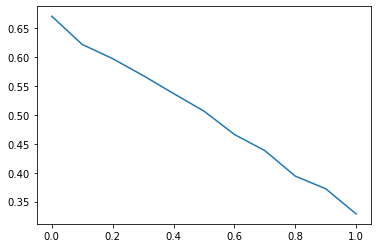

In [279]:
alphas = np.arange(0.0, 1.1, 0.1)
p_alpha = []

for value in alphas:

    trials = 10000
    monty_sim = [MontyHallExperiment(value) for i in range(trials)]

    trues = 0
    for item in monty_sim:
        if (item):
            trues +=1
    p_alpha.append(trues/trials)
    
print(p_alpha)

    


Text(0.5, 0, 'Alpha (probability of keeping selection)')

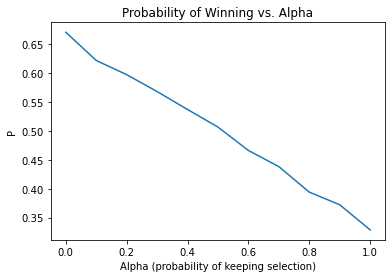

In [280]:
plt.figure()
plt.plot(alphas, p_alpha)
plt.title('Probability of Winning vs. Alpha')
plt.ylabel('P')
plt.xlabel('Alpha (probability of keeping selection)')

If you never switch, the probability of winning is about 0.33. If you always switch, the probability of winning is about 0.66. This also confirms my hypothesis in part A. 

## 2.1 Conditional Die Rolling

First we toss a coin (biased in general with parameter α), if Heads appears, we roll a four-sided die. If Tails appears,
we roll an eight-sided die.

**A)** Write a function named ConditionalDieRoll that emulates this experiment. The function should take the
parameter α as input, and needs to output a tuple containing the results of coin toss and die rolling (For example:
("H"; 3) or ("T"; 7)).

In [29]:
def BiasedCoinToss(a):
    choices = [0,1]
    probs = [1-a, a]
    result = np.random.choice(choices,1, p = probs)
    # or return result[0]
    if (result[0] == 1):
        return "H"
    else:
        return "T"
    
    
def DieRolling(sides):
    choices = np.arange(1, sides + 1)
    result = np.random.choice(choices,1)
    return result[0]


def ConditionalDieRoll(alpha=0.5):
    toss = BiasedCoinToss(alpha)
    if (toss == "H"):
        roll = DieRolling(4)
    else:
        roll = DieRolling(8)
    result = (toss, roll)
    return result

C) The calculated value matches the theoretical value

**B)** For α = 0:5 (i.e. suppose the coin toss is fair), generate 10000 samples of the experiment above

In [89]:
n_trials = 10000
exp_results = [ConditionalDieRoll(alpha = 0.5) for i in range(n_trials)]

**C)** Estimate the conditional probability $P(1|H)$. Of the 10000 experiments above, count the number
of times that Heads appeared for the coin. Let’s denote it by $n(H)$. Next, count the number of times that
Heads appeared for the coin and 1 appeared for the die. Let’s denote it by $n(H, 1)$. Calculate the fraction
$n(H, 1)/n(H)$. Compare to the theoretical value for $P(1|H)$

In [83]:
# count number of heads
heads = 0
h_1 = 0
for item in exp_results:
    if(item[0] == "H"):
        heads += 1
        if (item[1] == 1):
            h_1 += 1
    
print("Number of heads: ", heads)
print("Number of heads AND 1: ", h_1)
print("Probability of 1 given H: ", h_1/heads)

# Matches theoretical value of 0.25


Number of heads:  4945
Number of heads AND 1:  1199
Probability of 1 given H:  0.24246713852376137


**D)** Repeat part C for P(5|H), P(1|T), and P(5|T). Report the results

In [107]:
heads = 0
h_5 = 0
for item in exp_results:
    if(item[0] == "H"):
        heads += 1
        if (item[1] == 5): # the roll
            h_5 += 1
    
print("Number of heads: ", heads)
print("Number of heads AND 5: ", h_5)
print("Probability of 5 given H: ", h_5/heads)

print("theoretical result is 0")

Number of heads:  4980
Number of heads AND 5:  0
Probability of 5 given H:  0.0
theoretical result is 0


In [108]:
tails = 0
t_1 = 0
for item in exp_results:
    if(item[0] == "T"):
        tails += 1
        if (item[1] == 1): # the roll
            t_1 += 1
    
print("Number of tails: ", tails)
print("Number of tails AND 1: ", t_1)
print("Probability of 1 given T: ", t_1/tails)

print("theoretical result is 0.125")

Number of tails:  5020
Number of tails AND 1:  638
Probability of 1 given T:  0.12709163346613545
theoretical result is 0.125


In [109]:
tails = 0
t_5 = 0
for item in exp_results:
    if(item[0] == "T"):
        tails += 1
        if (item[1] == 5): # the roll
            t_5 += 1
    
print("Number of tails: ", tails)
print("Number of tails AND 5: ", t_5)
print("Probability of 5 given T: ", t_5/tails)

print("Theoretical result is 0.125")

Number of tails:  5020
Number of tails AND 5:  630
Probability of 5 given T:  0.1254980079681275
Theoretical result is 0.125


**E)** Repeat part C for P(H|5), P(T|5), P(T|1), and P(H|1). Report the result

In [110]:
fives = 0
fives_t = 0
for item in exp_results:
    if(item[1] == 5):
        fives += 1
        if (item[0] == "T"): # the roll
            fives_t += 1
    
print("Number of 5: ", fives)
print("Number of fives AND Tails: ", fives_t)
print("Probability of T given 5: ", fives_t/fives)

print("Theoretical result is 1")

Number of 5:  630
Number of fives AND Tails:  630
Probability of T given 5:  1.0
Theoretical result is 1


In [111]:
fives = 0
fives_h = 0
for item in exp_results:
    if(item[1] == 5):
        fives += 1
        if (item[0] == "H"): # the roll
            fives_h += 1
    
print("Number of 5: ", fives)
print("Number of fives AND heads: ", fives_h)
print("Probability of H given 5: ", fives_h/fives)
print("Theoretical result is 0")

Number of 5:  630
Number of fives AND heads:  0
Probability of H given 5:  0.0
Theoretical result is 0


In [112]:
ones = 0
ones_t = 0
for item in exp_results:
    if(item[1] == 1):
        ones += 1
        if (item[0] == "T"): # the roll
            ones_t += 1
    
print("Number of 1: ", ones)
print("Number of ones AND Tails: ", ones_t)
print("Probability of T given 1: ", ones_t/ones)

print("Theoretical result is 0.33")

Number of 1:  1843
Number of ones AND Tails:  638
Probability of T given 1:  0.34617471513836134
Theoretical result is 0.33


In [113]:
ones = 0
ones_h = 0
for item in exp_results:
    if(item[1] == 1):
        ones += 1
        if (item[0] == "H"): # the roll
            ones_h += 1
    
print("Number of 1: ", ones)
print("Number of 1 AND heads: ", ones_h)
print("Probability of H given 1: ", ones_h/ones)

print("Theoretical result is 0.66")

Number of 1:  1843
Number of 1 AND heads:  1205
Probability of H given 1:  0.6538252848616386
Theoretical result is 0.66


**F)** If you repeat parts B,C,D,E for $\alpha=0.75$, which probabilities do you expect to change, compared to $\alpha=0.5$? Now redo B,C,D,E for $\alpha=0.75$ and check that your results make sense.

A: The probabilities I expect to change are those involving the rolled numbers that appear in both Heads and Tails cases (i.e the probability of heads or tails given a 1). 

In [318]:
n_trials = 10000
exp_results = [ConditionalDieRoll(alpha = 0.75) for i in range(n_trials)]

In [319]:
# count number of heads
heads = 0
h_1 = 0
for item in exp_results:
    if(item[0] == "H"):
        heads += 1
        if (item[1] == 1):
            h_1 += 1
    
print("Number of heads: ", heads)
print("Number of heads AND 1: ", h_1)
print("Probability of 1 given H: ", h_1/heads)



Number of heads:  7437
Number of heads AND 1:  1860
Probability of 1 given H:  0.25010084711577246


In [327]:
heads = 0
h_5 = 0
for item in exp_results:
    if(item[0] == "H"):
        heads += 1
        if (item[1] == 5): # the roll
            h_5 += 1
    
print("Number of heads: ", heads)
print("Number of heads AND 5: ", h_5)
print("Probability of 5 given H: ", h_5/heads)



Number of heads:  7437
Number of heads AND 5:  0
Probability of 5 given H:  0.0


In [328]:
tails = 0
t_1 = 0
for item in exp_results:
    if(item[0] == "T"):
        tails += 1
        if (item[1] == 1): # the roll
            t_1 += 1
    
print("Number of tails: ", tails)
print("Number of tails AND 1: ", t_1)
print("Probability of 1 given T: ", t_1/tails)



Number of tails:  2563
Number of tails AND 1:  298
Probability of 1 given T:  0.11626999609832228


In [329]:
tails = 0
t_5 = 0
for item in exp_results:
    if(item[0] == "T"):
        tails += 1
        if (item[1] == 5): # the roll
            t_5 += 1
    
print("Number of tails: ", tails)
print("Number of tails AND 5: ", t_5)
print("Probability of 5 given T: ", t_5/tails)



Number of tails:  2563
Number of tails AND 5:  302
Probability of 5 given T:  0.11783066718689036


In [330]:
fives = 0
fives_t = 0
for item in exp_results:
    if(item[1] == 5):
        fives += 1
        if (item[0] == "T"): # the roll
            fives_t += 1
    
print("Number of 5: ", fives)
print("Number of fives AND Tails: ", fives_t)
print("Probability of T given 5: ", fives_t/fives)



Number of 5:  302
Number of fives AND Tails:  302
Probability of T given 5:  1.0


In [331]:
fives = 0
fives_h = 0
for item in exp_results:
    if(item[1] == 5):
        fives += 1
        if (item[0] == "H"): # the roll
            fives_h += 1
    
print("Number of 5: ", fives)
print("Number of fives AND heads: ", fives_h)
print("Probability of H given 5: ", fives_h/fives)


Number of 5:  302
Number of fives AND heads:  0
Probability of H given 5:  0.0


In [332]:
ones = 0
ones_t = 0
for item in exp_results:
    if(item[1] == 1):
        ones += 1
        if (item[0] == "T"): # the roll
            ones_t += 1
    
print("Number of 1: ", ones)
print("Number of ones AND Tails: ", ones_t)
print("Probability of T given 1: ", ones_t/ones)



Number of 1:  2158
Number of ones AND Tails:  298
Probability of T given 1:  0.1380908248378128


In [333]:
ones = 0
ones_h = 0
for item in exp_results:
    if(item[1] == 1):
        ones += 1
        if (item[0] == "H"): # the roll
            ones_h += 1
    
print("Number of 1: ", ones)
print("Number of 1 AND heads: ", ones_h)
print("Probability of H given 1: ", ones_h/ones)



Number of 1:  2158
Number of 1 AND heads:  1860
Probability of H given 1:  0.8619091751621872


## 2.2 Pregnancy Test

A medical lab has developed a new pregnancy test. If the test is applied to a pregnant (denoted by "P") case, it
will return positive results (denoted by +) with probability α. If the test is applied to a non-pregnant case (denoted
by "N") it will return negative results (denoted by -) with probability β. Suppose that of all the study population,
a fraction γ are pregnant and the rest are non-pregnant.

**A)** Find the theoretical expressions of P(+|P), P(−|P), P(+|N), and P(−|N) in terms of α, β, and γ.

Answer (Use Latex formatting): P(+|P) = α. P(-|P) = 1 - α. P(+|N) = 1 - β. P(-|N) = β. 


**B)** Find the theoretical expressions of P(P|+), P(P|−), P(N|−), and P(N|−) in terms of α, β, and γ.

Answer: Is in attached PDF 


**C)** Download and read the file "PregnancyData.csv", containing the pregnancy test data for a population of size 10000. The first column demonstrates the index of each case, the second column shows the Pregnancy/Nonpregnancy status, and the third column shows the result of the test on each subject.

In [115]:
import pandas as pd

path_to_data = './PregnancyData.csv'
df = pd.read_csv(path_to_data, delimiter = ',')
df.head()



,Subject_ID,Preg/NonPreg,Test_result
0,0,N,-
1,1,N,+
2,2,N,-
3,3,P,-
4,4,N,-


**D)** Estimate the parameters α, β and γ from the data. Explain how you do it

In [313]:
# alpha is num of num preg / + cases
# beta is - / num_Not pregnant
# gamma is number pregnant/total entries
pos_cases = df[df['Test_result'] == '+']
num_preg = np.sum(df['Preg/NonPreg'] == 'P')

alpha = np.sum(pos_cases['Preg/NonPreg'] == 'P') / num_preg
# 0.91
gamma = num_preg / 10000


neg_cases = df[df['Test_result'] == '-']
num_Npreg = np.sum(df['Preg/NonPreg'] == 'N')
beta = np.sum(neg_cases['Preg/NonPreg'] == 'N') / num_Npreg
# 0.797

print("Alpha: ", alpha)
print("Beta: ", beta)
print("Gamma: ", gamma)


Alpha:  0.9154334038054969
Beta:  0.7976277946887793
Gamma:  0.0473


**E)** Substitute your estimates of part D in the formulas of parts A and B, and calculate the numerical values of
each of the eight conditional probabilities.

In [383]:
p1 = alpha
p2 = 1 - alpha
p3 = 1 - beta
p4 = beta

p5 = (alpha*gamma) / (alpha*gamma + (1-gamma)*(1-beta))
p6 = ((1 - alpha)*gamma) / ((1 - alpha)*gamma + (1 - gamma)*beta)
p7 = ((1-gamma) * beta) / ((1 - alpha)*gamma + (1 - gamma)*beta)
p8 = ((1 - gamma) * (1 - beta)) / (alpha*gamma + (1-gamma)*(1-beta))

print('p1 - p4 are the probabilities of part A. p5-p8 are the probabilities of part B.')
print()
print(p1)
print(p2)
print(p3)
print(p4)
print()
print(p5)
print(p6)
print(p7)
print(p8)

p1 - p4 are the probabilities of part A. p5-p8 are the probabilities of part B.

0.9154334038054969
0.08456659619450313
0.2023722053112207
0.7976277946887793

0.18339686573485817
0.0052362874721822205
0.9947637125278178
0.8166031342651419


**F)** Now directly estimate the conditional probabilities of parts A and B from the data (Hint: Follow the logic in
section 2.1 part C). Compare the results to the numerical results of part E

In [350]:
print('p1: ', alpha) # already directly from data
print('p4: ', beta) # already directly from data




p1:  0.9154334038054969
p4:  0.7976277946887793


In [353]:
preg_cases = df[df['Preg/NonPreg'] == 'P']
preg_cases

,Subject_ID,Preg/NonPreg,Test_result
3,3,P,-
6,6,P,-
53,53,P,+
119,119,P,+
147,147,P,+
...,...,...,...
9881,9881,P,+
9899,9899,P,+
9936,9936,P,-
9968,9968,P,+


In [354]:
            
preg_cases = df[df['Preg/NonPreg'] == 'P']
preg_and_neg = np.sum(preg_cases['Test_result'] == '-')

print("Number pregnant: ", num_preg)
print("Number pregnant AND negative: ", preg_and_neg)
print("Probability of negative given pregnant: ", preg_and_neg/num_preg)



Number pregnant:  473
Number pregnant AND negative:  40
Probability of negative given pregnant:  0.08456659619450317


In [365]:
Npreg_cases = df[df['Preg/NonPreg'] == 'N']
Npreg_and_pos = np.sum(Npreg_cases['Test_result'] == '+')
num_Npreg = 10000 - num_preg

print("Number non-pregnant: ", num_Npreg)
print("Number non-pregnant AND positive: ", Npreg_and_pos)
print("Probability of positive given non-pregnant: ", Npreg_and_pos/num_Npreg)

Number non-pregnant:  9527
Number non-pregnant AND positive:  1928
Probability of positive given non-pregnant:  0.20237220531122074


In [382]:
num_pos = len(pos_cases.index)
pos_and_preg = np.sum(pos_cases['Preg/NonPreg'] == 'P')

print("Number positive: ", num_pos)
print("Number positive AND pregnant: ", pos_and_preg)
print("Probability of pregnant given positive: ", pos_and_preg/num_pos)

Number positive:  2361
Number positive AND pregnant:  433
Probability of pregnant given positive:  0.1833968657348581


In [386]:
num_neg = len(neg_cases.index)
neg_and_preg = np.sum(neg_cases['Preg/NonPreg'] == 'P')


print("Number negative: ", num_neg)
print("Number negative AND pregnant: ", neg_and_preg)
print("Probability of pregnant given negative: ", neg_and_preg/num_neg)

Number negative:  7639
Number negative AND pregnant:  40
Probability of pregnant given negative:  0.005236287472182223


In [387]:
neg_and_npreg = np.sum(neg_cases['Preg/NonPreg'] == 'N')

print("Number negative: ", num_neg)
print("Number negative AND not-pregnant: ", neg_and_npreg)
print("Probability of not-pregnant given negative: ", neg_and_npreg/num_neg)

Number negative:  7639
Number negative AND not-pregnant:  7599
Probability of not-pregnant given negative:  0.9947637125278178


In [388]:
pos_and_npreg = np.sum(pos_cases['Preg/NonPreg'] == 'N')

print("Number positive: ", num_pos)
print("Number positive AND not-pregnant: ", pos_and_npreg)
print("Probability of not-pregnant given positive: ", pos_and_npreg/num_pos)

Number positive:  2361
Number positive AND not-pregnant:  1928
Probability of not-pregnant given positive:  0.8166031342651419
